<a href="https://colab.research.google.com/github/dudesparsh/Applied-ML/blob/master/FastA1_course1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Start every notebook with these lines

%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [0]:
# Importing fast.ai libraries

from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64
# bs = 16
# If on a machine having smaller gpu, uncomment second line of this tab and restart kernel

In [6]:
# Help function to get information about anything

help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [7]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [8]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [10]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_23.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_177.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_46.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_126.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_76.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms = get_transforms(), size = 22).normalize(imagenet_stats)

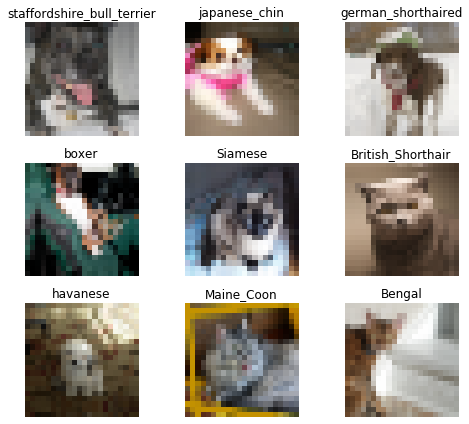

In [13]:
data.show_batch(rows = 3, figsize = (7,6))

In [14]:
print(data.classes)
len(data.classes), data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [15]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 39.1MB/s]


In [16]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [17]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,4.838062,3.935605,0.925575,00:45
1,4.228191,3.637474,0.895129,00:45
2,3.801226,3.473548,0.883627,00:44
3,3.620948,3.431535,0.883627,00:45


In [0]:
learn.save('stage-1')

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

losses, idxs = interp.top_losses()

len(data.valid_ds) == len(losses) == len(idxs)

True

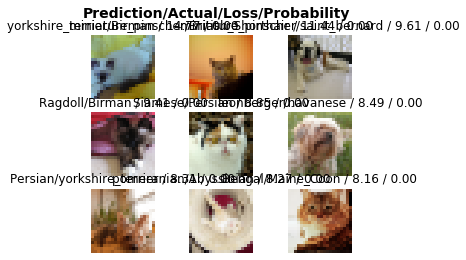

In [20]:
interp.plot_top_losses(9, figsize =(5,4))

In [21]:
doc(interp.plot_top_losses)

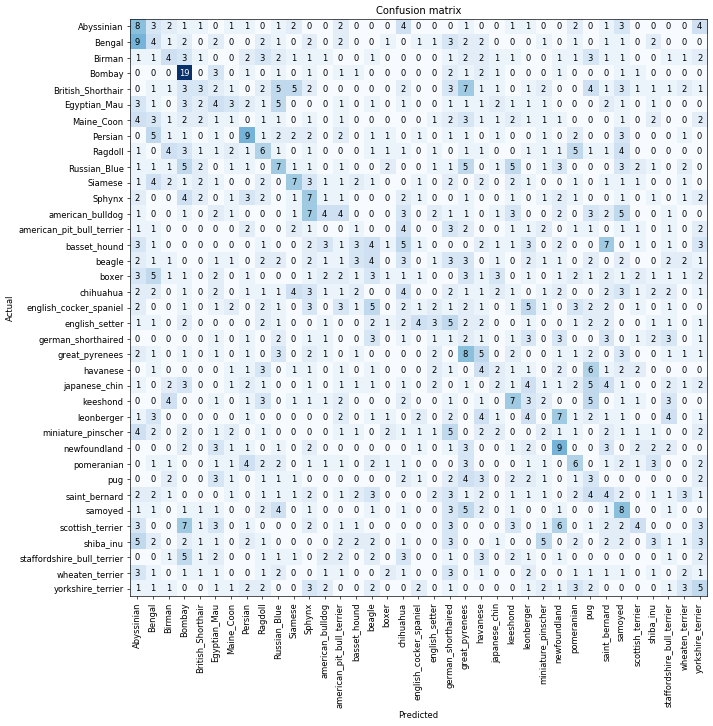

In [22]:
interp.plot_confusion_matrix(figsize=(12,12), dpi = 60)

In [23]:
interp.most_confused(min_val = 2)

[('Bengal', 'Abyssinian', 9),
 ('British_Shorthair', 'great_pyrenees', 7),
 ('american_bulldog', 'Sphynx', 7),
 ('basset_hound', 'saint_bernard', 7),
 ('leonberger', 'newfoundland', 7),
 ('scottish_terrier', 'Bombay', 7),
 ('havanese', 'pug', 6),
 ('scottish_terrier', 'newfoundland', 6),
 ('British_Shorthair', 'Russian_Blue', 5),
 ('British_Shorthair', 'Siamese', 5),
 ('Egyptian_Mau', 'Russian_Blue', 5),
 ('Persian', 'Bengal', 5),
 ('Ragdoll', 'pomeranian', 5),
 ('Russian_Blue', 'Bombay', 5),
 ('Russian_Blue', 'great_pyrenees', 5),
 ('Russian_Blue', 'keeshond', 5),
 ('american_bulldog', 'samoyed', 5),
 ('basset_hound', 'chihuahua', 5),
 ('boxer', 'Bengal', 5),
 ('english_cocker_spaniel', 'beagle', 5),
 ('english_cocker_spaniel', 'leonberger', 5),
 ('english_setter', 'german_shorthaired', 5),
 ('great_pyrenees', 'havanese', 5),
 ('japanese_chin', 'pug', 5),
 ('keeshond', 'pug', 5),
 ('miniature_pinscher', 'german_shorthaired', 5),
 ('samoyed', 'great_pyrenees', 5),
 ('shiba_inu', 'Abyss

In [24]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,3.524579,3.229343,0.857239,00:46


In [0]:
learn.load('stage-1');

In [26]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


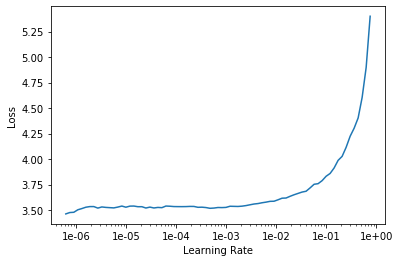

In [27]:
# To plot the graph of LR finder
learn.recorder.plot()

In [28]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr = slice(1e-6, 1e-4))
# around 80% error rate

epoch,train_loss,valid_loss,error_rate,time
0,3.536777,3.414183,0.880920,00:44
1,3.500469,3.374939,0.869418,00:44


In [0]:
# Earlier we used CNN : resnet 34,  now we will be using a better version that is resnet 50

data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [30]:
learn = cnn_learner(data, models.resnet50, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:03<00:00, 28.6MB/s]


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


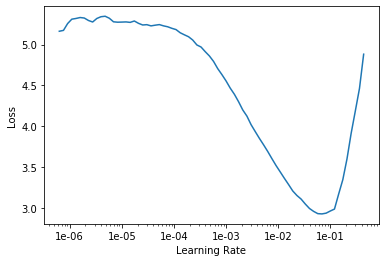

In [31]:
learn.lr_find()
learn.recorder.plot()

In [32]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.716762,0.256962,0.087957,02:10
1,0.514046,0.214220,0.073072,02:09
2,0.402989,0.241501,0.075101,02:09
3,0.337796,0.208398,0.062923,02:10
4,0.259918,0.173286,0.057510,02:09
5,0.187384,0.137780,0.046008,02:10
6,0.138941,0.126132,0.043302,02:09
7,0.102210,0.124728,0.044655,02:08


In [0]:
learn.save('stage-1-50')

In [37]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr= slice(1e-6, 1e-4))
# Now the came comes out to be order of ~95%

epoch,train_loss,valid_loss,error_rate,time
0,0.116018,0.138824,0.043978,02:29
1,0.109661,0.126471,0.045332,02:26
2,0.083924,0.127081,0.041272,02:24


In [0]:
learn.load('stage-1-50');

In [38]:
interp = ClassificationInterpretation.from_learner(learn)

In [40]:
interp.most_confused(min_val = 2)

[('Birman', 'Ragdoll', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Egyptian_Mau', 'Bengal', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('Siamese', 'Birman', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('miniature_pinscher', 'chihuahua', 2)]

In [41]:
# Now using other data formats

path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/root/.fastai/data/mnist_sample')

In [0]:
tfms = get_transforms(do_flip = False)
data = ImageDataBunch.from_folder(path, ds_tfms = tfms, size = 26)

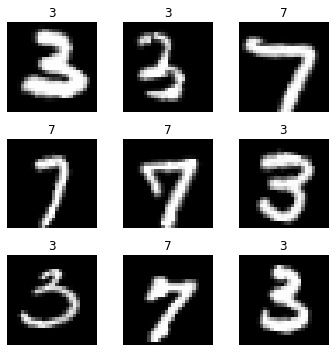

In [46]:
data.show_batch(rows =3, figsize= (5,5))

In [47]:
learn = cnn_learner(data, models.resnet18, metrics = accuracy)
learn.fit(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.198074,0.102524,0.961236,00:18
1,0.125425,0.066797,0.975466,00:18


In [48]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [0]:
data = ImageDataBunch.from_csv(path, ds_tfms = tfms, size =28)

[0, 1]

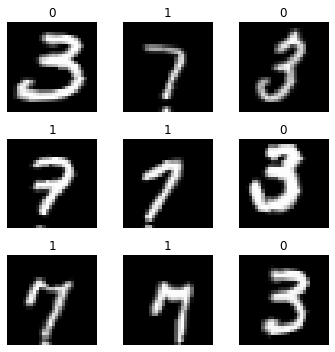

In [50]:
data.show_batch(rows=3, figsize=(5,5))
data.classes

In [51]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

[0, 1]

In [53]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]


[PosixPath('/root/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/root/.fastai/data/mnist_sample/train/3/21102.png')]

In [55]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [59]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

['3', '7']

In [60]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

In [61]:
data = ImageDataBunch.from_lists(path, fn_paths, labels = labels, ds_tfms = tfms, size = 24)
data.classes

['3', '7']